# Installing Pyforest Library

In [ ]:
!pip install pyforest

# Mounting The Google Drive So That We Can Access Data From Gdrive

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing All The Required Libraries

In [ ]:
from pyforest import *
import csv
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import CategoricalDtype
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Let's Check If We Have CPU Or Cuda

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'
print(device)

<IPython.core.display.Javascript object>

cpu


# Passing The Path For Training And Testing Data

In [ ]:
#df1 = pd.read_csv("/content/gdrive/MyDrive/Cap/sign_mnist_train.csv")
#df2 = pd.read_csv("/content/gdrive/MyDrive/Cap/sign_mnist_test.csv")

train_file = "/content/drive/MyDrive/Cap/sign_mnist_train.csv"
test_file = "/content/drive/MyDrive/Cap/sign_mnist_test.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parsing Data

In [ ]:
# Parsing data from input and returning images and labels
def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

# Checking Shape After Parsing The Data

In [ ]:
# After parsing, let's see how's the shape of the data look like
training_images, training_labels = parse_data_from_input(train_file)
validation_images, validation_labels = parse_data_from_input(test_file)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


# Visualizing The Training Images

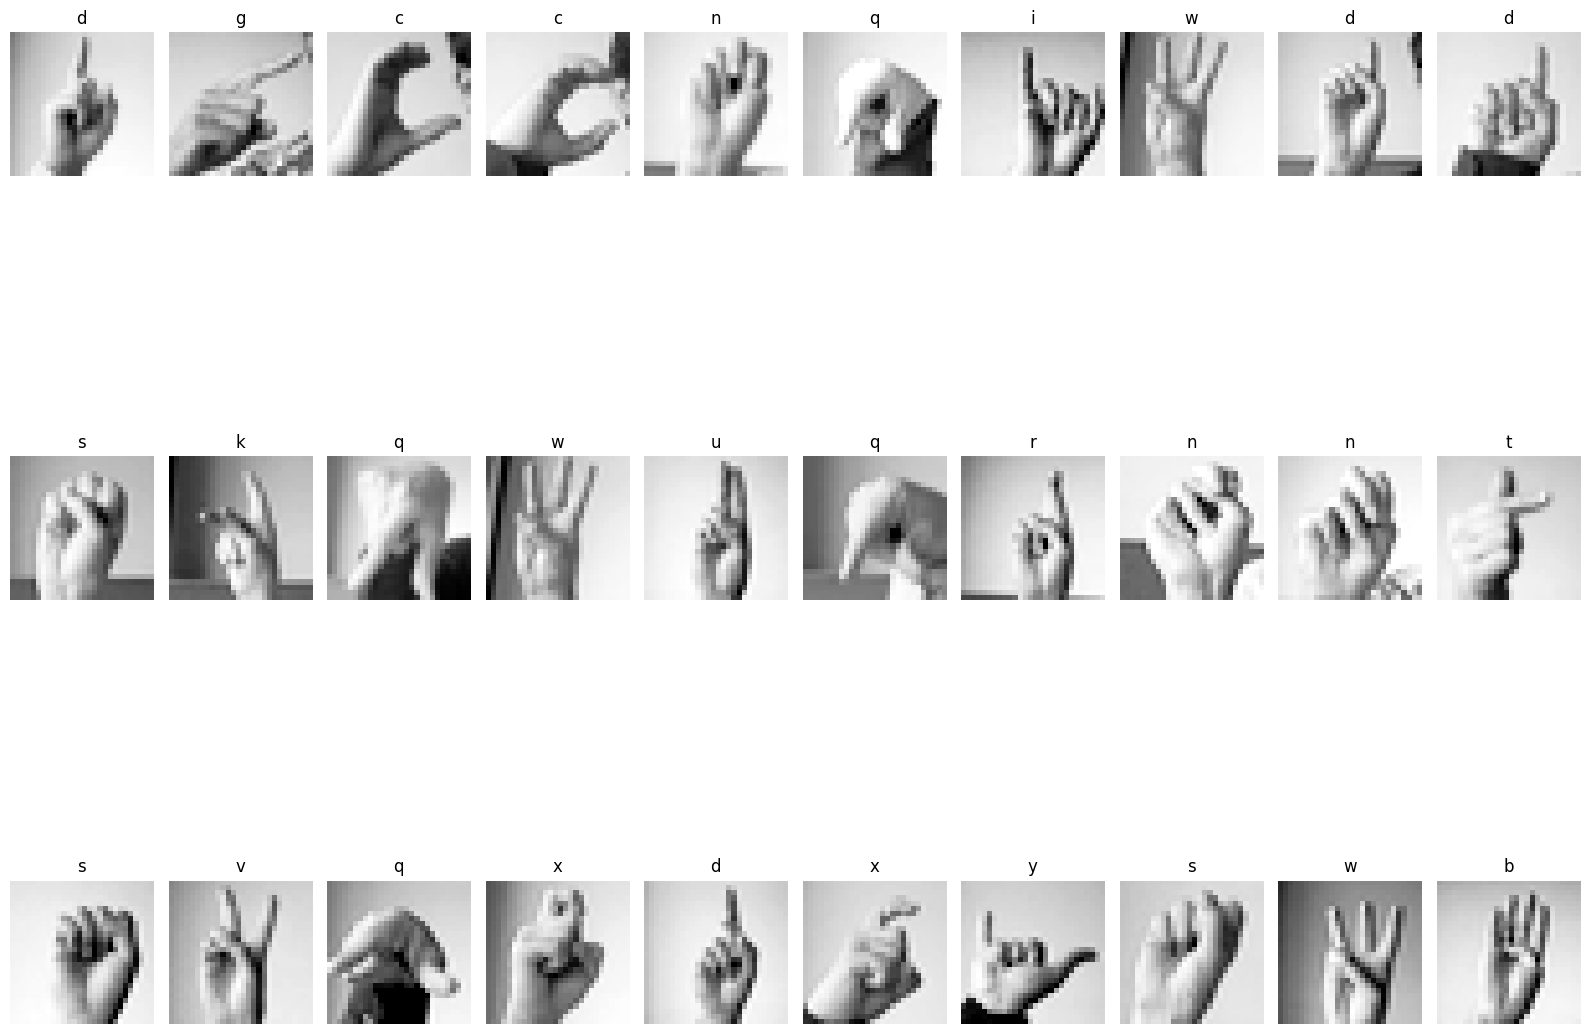

In [ ]:
# Plot a sample of 30 images from the training set

def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

# Storing The Training Data In Dataframe

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Cap/sign_mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Storing The Testing Data In Dataframe

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Cap/sign_mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Checking The Training Columns

In [ ]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

# Checking Which Alphabet Occurs How Many Times

In [ ]:
train_df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

# Shape Gives The Number Of Rows And Columns

In [ ]:
train_df.shape

(27455, 785)

# Are There Any Null Values?

In [ ]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

# Time To Do Some EDA(Exploratory Data Analysis)

> Indented block



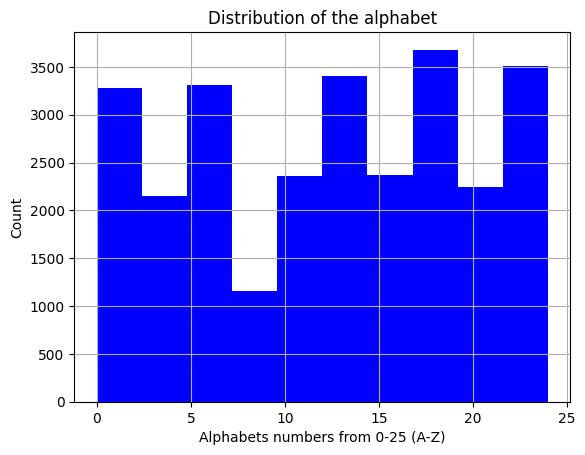

In [ ]:
train_df.label.hist(color='blue',bins=10)
plt.title("Distribution of the alphabet")
plt.xlabel('Alphabets numbers from 0-25 (A-Z)')
plt.ylabel('Count')
plt.show()

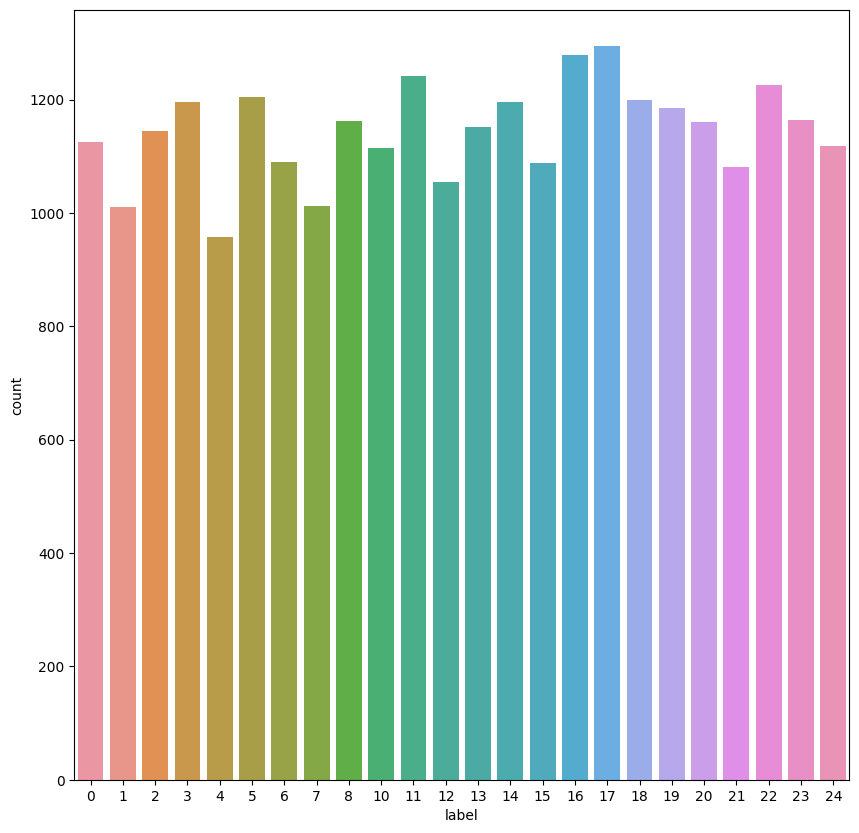

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.countplot(x=train_df['label'])
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(train_df, values=train_df.label, names=train_df.label, title='Count of alphabets')
fig.show()

# Dropping The Label Column From Training And Keeping It For Testing Data

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

# Installing CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


# Importing The In-Built Libraries For Building The Model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Support Vector Classifier

In [ ]:
svc = SVC(random_state=5)
svc.fit(X_train, y_train)
print('='*25)
print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

SVC
accuracy of train set: 1.0
accuracy of test set: 0.8418851087562744


# Linear Support Vector Classifier

In [ ]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print('='*25)
print('LinearSVC')
print(f'accuracy of train set: {lsvc.score(X_train, y_train)}')
print(f'accuracy of test set: {lsvc.score(X_test, y_test)}')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC
accuracy of train set: 1.0
accuracy of test set: 0.5996932515337423


# Stochastic Gradient Descent Classifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('='*25)
print('SGD Classifier')
print(f'accuracy of train set: {sgd.score(X_train, y_train)}')
print(f'accuracy of test set: {sgd.score(X_test, y_test)}')

SGD Classifier
accuracy of train set: 0.9871061737388453
accuracy of test set: 0.6221416620189626


# K-Nearest Neighbor Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_test, y_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_train, y_train)}')
print(f'accuracy of test set: {rf.score(X_test, y_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8092582264361405


# Decision Tree Classifier

In [ ]:
decisiontree = DecisionTreeClassifier(max_depth=50, random_state=5)
decisiontree.fit(X_train, y_train)
print('='*25)
print('DecisionTreeClassifier')
print(f'accuracy of train set: {decisiontree.score(X_train, y_train)}')
print(f'accuracy of test set: {decisiontree.score(X_test, y_test)}')

DecisionTreeClassifier
accuracy of train set: 1.0
accuracy of test set: 0.4348856664807585


# Bagging Classifier

In [ ]:
bagging = BaggingClassifier(ExtraTreeClassifier(random_state=5))
bagging.fit(X_train, y_train)
print('='*25)
print('BaggingClassifier')
print(f'accuracy of train set: {bagging.score(X_train, y_train)}')
print(f'accuracy of test set: {bagging.score(X_test, y_test)}')

BaggingClassifier
accuracy of train set: 0.9999635767619741
accuracy of test set: 0.6730340211935304


# Light Gradient Boosting Model Classifier

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print('='*25)
print('LGBM Classifier')
print(f'accuracy of train set: {lgbm.score(X_train, y_train)}')
print(f'accuracy of test set: {lgbm.score(X_test, y_test)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.345060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 179589
[LightGBM] [Info] Number of data points in the train set: 27455, number of used features: 784
[LightGBM] [Info] Start training from score -3.193877
[LightGBM] [Info] Start training from score -3.302598
[LightGBM] [Info] Start training from score -3.178017
[LightGBM] [Info] Start training from score -3.133566
[LightGBM] [Info] Start training from score -3.356500
[LightGBM] [Info] Start training from score -3.126899
[LightGBM] [Info] Start training from score -3.226371
[LightGBM] [Info] Start training from score -3.299632
[LightGBM] [Info] Start training from score -3.162406
[LightGBM] [Info] Start training from score -3.204591
[LightGBM] [Info] Start training from score -3.096631
[LightGBM] [Info] Start training from score -3.259008
[LightGBM] [Info] Start training from score -3.171917
[Light

# CatBoosting Classifier

In [ ]:
catboost = CatBoostClassifier(learning_rate=0.3, max_depth=10, n_estimators=25)
catboost.fit(X_train, y_train)
print('='*25)
print('CatBoost Classifier')
print(f'accuracy of train set: {catboost.score(X_train, y_train)}')
print(f'accuracy of test set: {catboost.score(X_test, y_test)}')

0:	learn: 2.4088305	total: 1m 51s	remaining: 44m 32s
1:	learn: 1.9359334	total: 3m 42s	remaining: 42m 36s
2:	learn: 1.5939200	total: 5m 31s	remaining: 40m 30s
3:	learn: 1.3613254	total: 7m 21s	remaining: 38m 39s
4:	learn: 1.1771566	total: 9m 12s	remaining: 36m 48s
5:	learn: 1.0555906	total: 10m 58s	remaining: 34m 46s
6:	learn: 0.9468483	total: 12m 46s	remaining: 32m 51s
7:	learn: 0.8238494	total: 14m 41s	remaining: 31m 12s
8:	learn: 0.7333758	total: 16m 29s	remaining: 29m 18s
9:	learn: 0.6519195	total: 18m 19s	remaining: 27m 28s
10:	learn: 0.5947239	total: 20m 9s	remaining: 25m 39s
11:	learn: 0.5424499	total: 22m	remaining: 23m 50s
12:	learn: 0.4983981	total: 23m 49s	remaining: 21m 59s
13:	learn: 0.4694163	total: 25m 36s	remaining: 20m 7s
14:	learn: 0.4417850	total: 27m 25s	remaining: 18m 16s
15:	learn: 0.4199057	total: 29m 13s	remaining: 16m 26s
16:	learn: 0.3886450	total: 31m 2s	remaining: 14m 36s
17:	learn: 0.3686915	total: 32m 48s	remaining: 12m 45s
18:	learn: 0.3399776	total: 34m 

# Voting Classifier

In [ ]:
%%time
estimators = [
    ("svc", svc),
    ("knn", knn),
    ("rf", rf),
    ("extratree", bagging),
    ("lgbm", lgbm)]

vote = VotingClassifier(estimators=estimators)
vote.fit(X_train, y_train)
print('='*25)
print('VotingClassifier')
print(f'accuracy of train set: {vote.score(X_train, y_train)}')
print(f'accuracy of test set: {vote.score(X_test, y_test)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.811495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 179589
[LightGBM] [Info] Number of data points in the train set: 27455, number of used features: 784
[LightGBM] [Info] Start training from score -3.193877
[LightGBM] [Info] Start training from score -3.302598
[LightGBM] [Info] Start training from score -3.178017
[LightGBM] [Info] Start training from score -3.133566
[LightGBM] [Info] Start training from score -3.356500
[LightGBM] [Info] Start training from score -3.126899
[LightGBM] [Info] Start training from score -3.226371
[LightGBM] [Info] Start training from score -3.299632
[LightGBM] [Info] Start training from score -3.162406
[LightGBM] [Info] Start training from score -3.204591
[LightGBM] [Info] Start training from score -3.096631
[LightGBM] [Info] Start training from score -3.259008
[LightGBM] [Info] Start training from score -3.171917
[Light

# Predicting The Voting Classifier

In [ ]:
y_pred = vote.predict(X_test)

# Classification Report For Voting Classifier

In [ ]:
print(classification_report(y_test, y_pred))  #Classification report for Voting Classifier

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       331
           1       0.99      0.95      0.97       432
           2       0.93      1.00      0.96       310
           3       0.88      1.00      0.93       245
           4       0.87      0.99      0.93       498
           5       0.87      0.91      0.89       247
           6       0.92      0.94      0.93       348
           7       0.99      0.95      0.97       436
           8       0.88      0.87      0.87       288
          10       0.81      0.73      0.76       331
          11       0.84      1.00      0.91       209
          12       0.84      0.68      0.75       394
          13       0.85      0.57      0.68       291
          14       1.00      0.83      0.91       246
          15       0.98      1.00      0.99       347
          16       0.93      0.99      0.96       164
          17       0.26      0.49      0.34       144
          18       0.66    

# Confusion Matrix

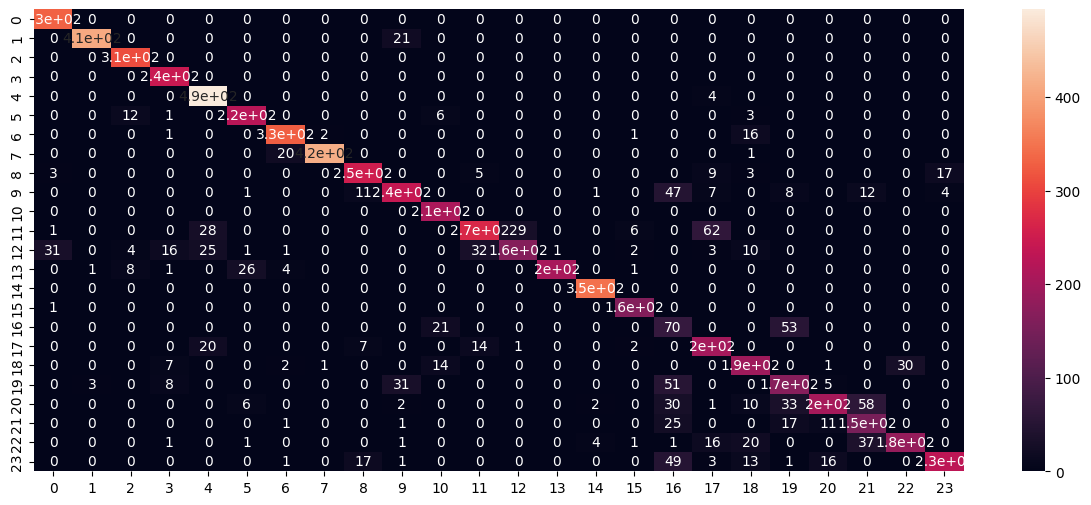

In [ ]:
plt.figure(figsize=(15,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

# Performing PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [ ]:
%%time
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X/255)
only_pca_data = np.vstack((only_pca_data.T)).T

pca_tsne_model = TSNE(n_components=2, random_state=0, perplexity=70, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y)).T
pca_tsne_train = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_train.head()

CPU times: user 11min 33s, sys: 30.3 s, total: 12min 3s
Wall time: 12min 2s


,PC 1,PC 2,label
0,34.831448,-43.907959,3.0
1,64.197983,-44.332535,6.0
2,-28.847353,-110.225883,2.0
3,1.437969,-128.044266,2.0
4,-64.775307,29.327328,13.0


# Visualizing The Data After Performing PCA

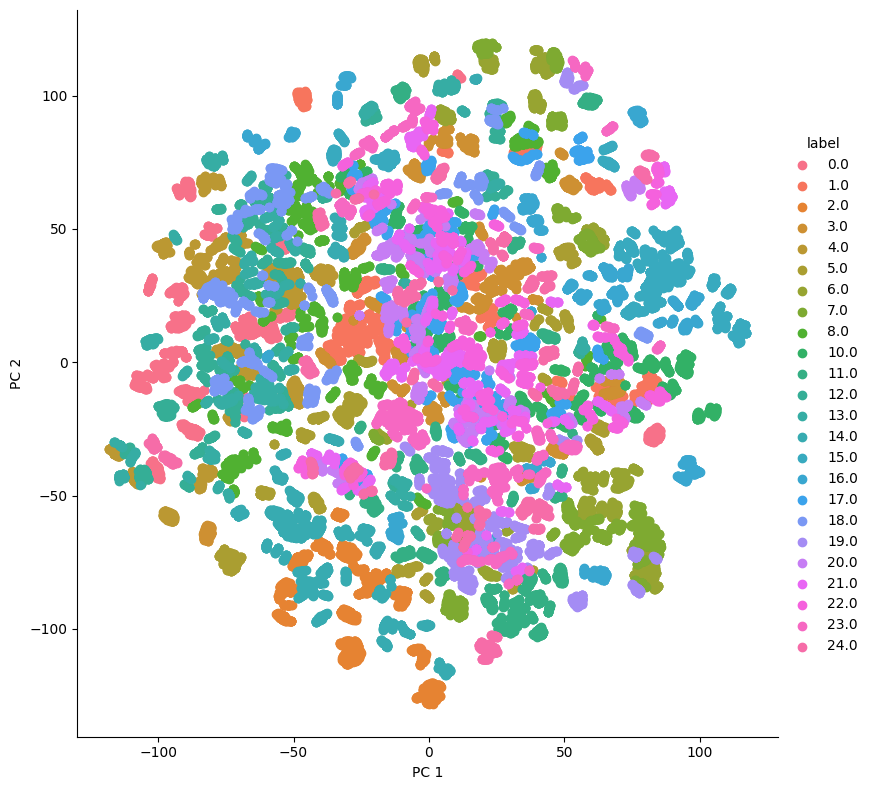

In [ ]:
sns.FacetGrid(pca_tsne_train, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

In [ ]:
X_pca_train = pca_tsne_train.drop(columns=['label'])[:27455]
y_pca_train = pca_tsne_train['label'][:27455]

X_pca_test = pca_tsne_train.drop(columns=['label'])[27455:].reset_index(drop=True)
y_pca_test = pca_tsne_train['label'][27455:].reset_index(drop=True)

In [ ]:
X_pca_train = X_pca_train.join(X_train)
X_pca_test = X_pca_test.join(X_test)

# Accuracy Of The Model After Performing PCA

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, y_pca_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {knn.score(X_pca_test, y_pca_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


In [ ]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_pca_train, y_pca_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {rf.score(X_pca_test, y_pca_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8139988845510318


In [ ]:
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X_train/255)
only_pca_data = np.vstack((only_pca_data.T, y_train)).T

pca_tsne_model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y_train)).T
pca_tsne_df = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_df.head()

In [ ]:
sns.FacetGrid(pca_tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Building Neural Network

In [ ]:
# Building a Neural Network Model

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, 128)
        self.layer_3 = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self, inputs):
        output_1 = self.relu(self.layer_1(inputs))
        output_2 = self.relu(self.layer_2(output_1))
        output = self.layer_3(output_2)

        return output

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Cap/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Cap/sign_mnist_test.csv')

In [ ]:
train_labels = train_df['label'].values
test_labels=test_df['label'].values
train_images = (train_df.iloc[:,1:].values).astype('float32')
test_images = (test_df.iloc[:,1:].values).astype('float32')

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [ ]:
train_images_tensor = (torch.tensor(train_images)/255.0)
train_labels_tensor = (torch.tensor(train_labels))
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

test_images_tensor = (torch.tensor(test_images)/255.0)
test_labels_tensor = (torch.tensor(test_labels))
test_tensor = TensorDataset(test_images_tensor, test_labels_tensor)

In [ ]:
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=16, num_workers=2, shuffle=False)

In [ ]:
# Building a Simple Neural Network model
model = NeuralNet(28*28, 500, 25)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epoch = 5

In [ ]:
torch.manual_seed(0)

total_step = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'    # Passing the epochs from previous cell
           .format(epoch+1, num_epoch, i+1, total_step, loss.item()))

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

In [ ]:
pred_lst = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        pred_lst.extend(list(predicted))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total)) # Accuracy for Neural Networks